In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import normaltest

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statement

# 2. Data Gathering

In [2]:
train_df = pd.read_csv('train_data.csv')
train_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [3]:
test_df = pd.read_csv('test_data.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [4]:
# testing data information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [5]:
# training data null values
train_df.isna().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [6]:
[feature for feature in train_df.columns if train_df[feature].isna().sum()>0]

['Job title']

In [7]:
# testing data null values
test_df.isna().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [8]:
[feature for feature in test_df.columns if test_df[feature].isna().sum()>0]

['Job title']

# 

# Appending data into single data frame

In [9]:
# here we are appending test data to train data
# so that it is easy for us to explore whole data
df = train_df.append(test_df)
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null  

In [11]:
# whole dataset null values
df.isna().sum()

ID                         0
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family member count        0
Account age                0
Is high risk               0
dtype: int64

In [12]:
# separating numerical and categorical variables
num = df.select_dtypes(include='number')
cat = df.select_dtypes(include='object')

In [13]:
num.columns

Index(['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [14]:
cat.columns

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

# 

# 3. Getting insight from data(categorical variables) 

In [15]:
cat.columns

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

### 1.Gender

<AxesSubplot:xlabel='Is high risk', ylabel='count'>

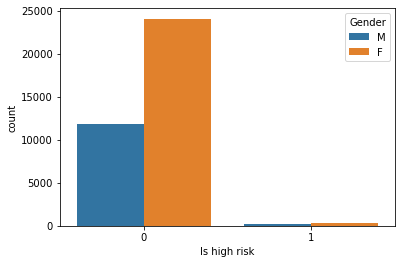

In [16]:
sns.countplot('Is high risk',hue='Gender',data=df)
# Observation :- 
# In a total number of 'no risky applicants', 'females' are more than the 'males'.
# 'females' candidates have more chances of getting credit card approved
# we also see, it is an imbalanced data,that might affect our accuracy, so we need to handle this.

### 2. Marital status

<AxesSubplot:xlabel='Is high risk', ylabel='count'>

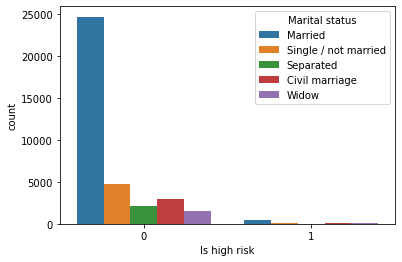

In [17]:
sns.countplot('Is high risk',hue='Marital status',data=df)
# Observation :- 
# Possibility of a 'married' applicant to approve credit card is higher.
# 'Married' applicants bears low risk, followed by 'single/non married' applicants.

### 3. Has a car

<AxesSubplot:xlabel='Is high risk', ylabel='count'>

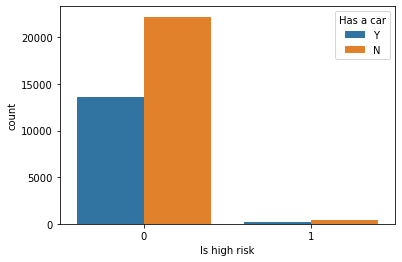

In [18]:
sns.countplot('Is high risk',hue='Has a car',data=df)
# Observations :-
# Credit card approved for applicants 'with no car' is highet,as they bears a lower risk

<AxesSubplot:xlabel='Has a car', ylabel='count'>

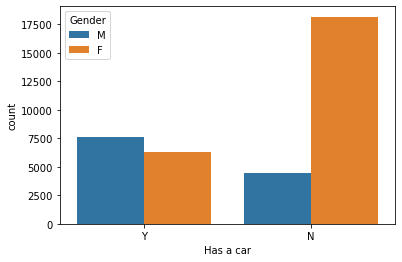

In [19]:
sns.countplot('Has a car',hue='Gender',data=df)

# Observations :-
# There are more 'male' candidate that posses car than 'female' candidate.

### 4. Employment status

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: Employment status, dtype: int64


<AxesSubplot:xlabel='Is high risk', ylabel='count'>

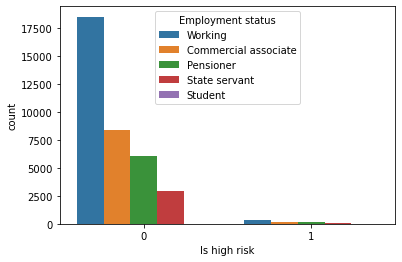

In [20]:
print(df['Employment status'].value_counts())
sns.countplot('Is high risk', hue='Employment status',data=df)

# observations:-
# 'Students' have no chance of getting loan approved.
# we can also say that not much records are available for 'students'.
# 'Working' are more in number in dataset, and also has a higher chances of getting credit card approved. 

### 5. Education level

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education level, dtype: int64


<AxesSubplot:xlabel='Is high risk', ylabel='count'>

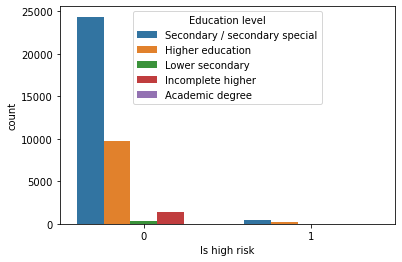

In [21]:
print(df['Education level'].value_counts())
sns.countplot('Is high risk',hue='Education level',data=df)

# Observations :-
# 'Secondary / secondary special' has a low risky applicants, so the possibility to get credit card approved is higher.
# followed by 'higher education'.
# Very low data is available for 'Academic degree' and 'Lower secondary' education level.

<AxesSubplot:xlabel='Education level', ylabel='count'>

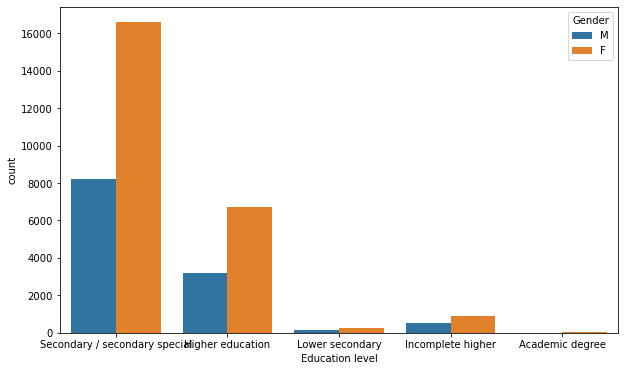

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('Education level',hue='Gender',data=df)

# Observations :- 
# 'Secondary / secondary special, Higher education, Lower secondary, Academic degree' , in below mention category,
# we can say that, more number of 'females' are educated than 'male'.

### 6. Has a property

Y    24506
N    11951
Name: Has a property, dtype: int64


<AxesSubplot:xlabel='Is high risk', ylabel='count'>

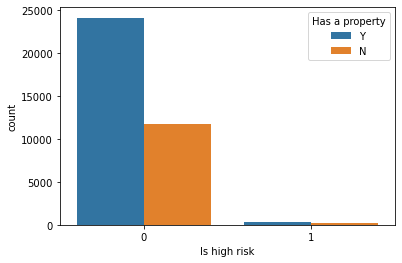

In [23]:
print(df['Has a property'].value_counts())
sns.countplot('Is high risk',hue='Has a property',data=df)
# Observations :- 
# Applicant 'with a propert'y have higher chance of getting credit card approved that applicant with 'no property'

Y    24506
N    11951
Name: Has a property, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

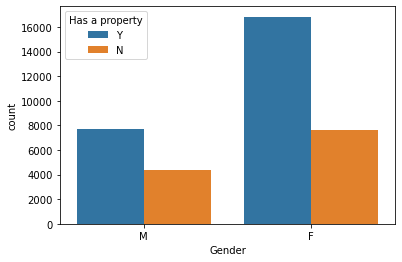

In [24]:
print(df['Has a property'].value_counts())
sns.countplot('Gender',hue='Has a property',data=df)

### 7. Dwelling

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: Dwelling, dtype: int64


<AxesSubplot:xlabel='Is high risk', ylabel='count'>

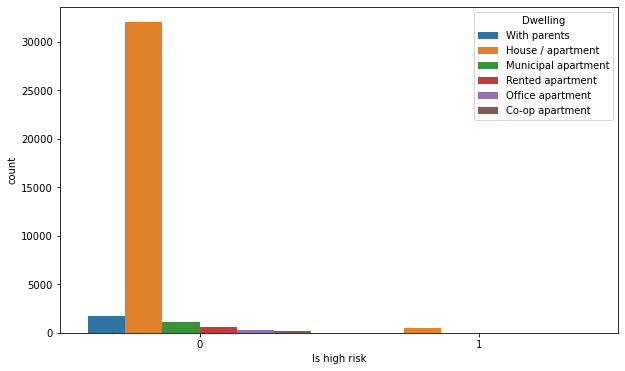

In [25]:
print(df['Dwelling'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot('Is high risk',hue='Dwelling',data=df)

# Observations :-
# More data is available for applicant with 'house / apartment'.
# Applicant with 'house / apartment' have more chances of credit card approval.

In [26]:
cat.columns

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

### 8. Job title

{'Laborers': 6211, 'Core staff': 3591, 'Sales staff': 3485, 'Managers': 3012, 'Drivers': 2138, 'High skill tech staff': 1383, 'Accountants': 1241, 'Medicine staff': 1207, 'Cooking staff': 655, 'Security staff': 592, 'Cleaning staff': 551, 'Private service staff': 344, 'Low-skill Laborers': 175, 'Waiters/barmen staff': 174, 'Secretaries': 151, 'HR staff': 85, 'Realty agents': 79, 'IT staff': 60}


<AxesSubplot:xlabel='Is high risk', ylabel='count'>

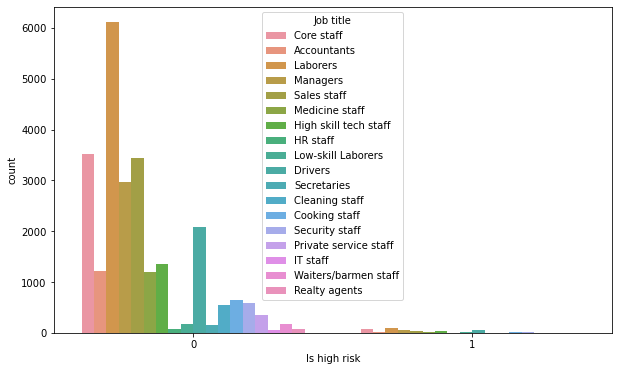

In [27]:
print(df['Job title'].value_counts().to_dict())
plt.figure(figsize=(10,6))
sns.countplot('Is high risk',hue='Job title',data=df)

# Observations :- 
# 'Laborers' are more in number in dataset, followed by 'Cire staff'.
# 'Laborers' are low risky applicants

# 

In [28]:
num.columns

Index(['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

### 1. Children count

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: Children count, dtype: int64


<AxesSubplot:xlabel='Is high risk', ylabel='count'>

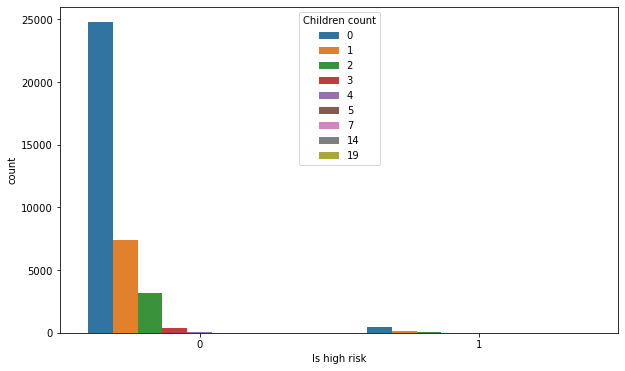

In [29]:
print(df['Children count'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot('Is high risk',hue='Children count',data=df)

# Observations :-
# More data available for applicants with zero children.
# Applicant with zero children have more chances of getting credit card approved.
# 

# 

# 4. EDA

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null  

In [31]:
# We dont need 'ID' column, so we are dropping it.
# There is unique Id for every customer.
df.drop('ID',axis=1,inplace=True)

### 1. Gender

In [32]:
df['Gender'].value_counts()

F    24430
M    12027
Name: Gender, dtype: int64

In [33]:
df['Gender'] = df['Gender'].replace({'F' : 0, 'M' : 1})

In [34]:
df['Gender'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36457 entries, 0 to 7291
Series name: Gender
Non-Null Count  Dtype
--------------  -----
36457 non-null  int64
dtypes: int64(1)
memory usage: 569.6 KB


### 2. Has a car

In [35]:
df['Has a car'].value_counts()

N    22614
Y    13843
Name: Has a car, dtype: int64

In [36]:
df['Has a car'] = df['Has a car'].replace({'N' : 0, 'Y' : 1})

In [37]:
df['Has a car'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36457 entries, 0 to 7291
Series name: Has a car
Non-Null Count  Dtype
--------------  -----
36457 non-null  int64
dtypes: int64(1)
memory usage: 569.6 KB


### 3. Has a property

In [38]:
df['Has a property'].value_counts()

Y    24506
N    11951
Name: Has a property, dtype: int64

In [39]:
df['Has a property'] = df['Has a property'].replace({'N' : 0, 'Y' : 1})

In [40]:
df['Has a property'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36457 entries, 0 to 7291
Series name: Has a property
Non-Null Count  Dtype
--------------  -----
36457 non-null  int64
dtypes: int64(1)
memory usage: 569.6 KB


### 4. Employment status

In [41]:
df['Employment status'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: Employment status, dtype: int64

In [42]:
df['Employment status'].replace({"Student": 0 , 'Pensioner' : 1, 'Working' : 2, 'Commercial associate' : 3, 
                               'State servant' : 4},inplace=True)

In [43]:
df['Employment status'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36457 entries, 0 to 7291
Series name: Employment status
Non-Null Count  Dtype
--------------  -----
36457 non-null  int64
dtypes: int64(1)
memory usage: 569.6 KB


### 5. Education level

In [44]:
df['Education level'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education level, dtype: int64

In [45]:
# Here we are using label encoder. We can also use replace function or one hot encoding technique

In [46]:
label_enc = LabelEncoder()
df['Education level'] = label_enc.fit_transform(df['Education level'])
df['Education level'].value_counts()

4    24777
1     9864
2     1410
3      374
0       32
Name: Education level, dtype: int64

### 6. Marital status

In [47]:
df['Marital status'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: Marital status, dtype: int64

In [48]:
df['Marital status'] = label_enc.fit_transform(df['Marital status'])

In [49]:
df['Marital status'].value_counts()

1    25048
3     4829
0     2945
2     2103
4     1532
Name: Marital status, dtype: int64

### 7. Dwelling

In [50]:
df['Dwelling'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: Dwelling, dtype: int64

In [51]:
df['Dwelling'] = label_enc.fit_transform(df['Dwelling'])

In [52]:
df['Dwelling'].value_counts()

1    32548
5     1776
2     1128
4      575
3      262
0      168
Name: Dwelling, dtype: int64

### 8. Job title

In [53]:
df['Job title'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: Job title, dtype: int64

In [54]:
df['Job title'].isna().sum()

11323

In [55]:
# Observation :- 
# There are null values present in 'Job title' 
# so we have to fill these null values.
# by observation, we can say that, it is a categorical variable.
# So the best way to fill null values for categorical variable is, to replace it with mode.

In [56]:
df['Job title'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: Job title, dtype: int64

In [57]:
df['Job title'].fillna('Laborers',inplace=True)

In [58]:
df['Job title'].value_counts()

Laborers                 17534
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: Job title, dtype: int64

In [59]:
df['Job title']= label_enc.fit_transform(df['Job title'])

In [60]:
df['Job title'].isna().sum()

0

In [61]:
#df['Job title'].value_counts()

In [62]:
df['Job title'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36457 entries, 0 to 7291
Series name: Job title
Non-Null Count  Dtype
--------------  -----
36457 non-null  int32
dtypes: int32(1)
memory usage: 427.2 KB


In [63]:
#df.info()

# 

## Handling outliers

### 1. Children count

<AxesSubplot:xlabel='Children count'>

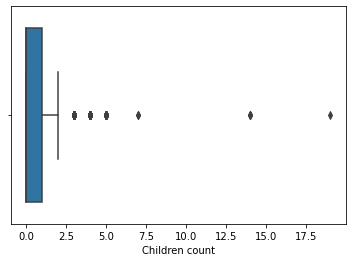

In [64]:
#boxplot before handling outliers
sns.boxplot(df['Children count'])

In [65]:
df['Children count'].value_counts().to_dict()

{0: 25201, 1: 7492, 2: 3256, 3: 419, 4: 63, 5: 20, 14: 3, 7: 2, 19: 1}

In [66]:
q1,q3 = np.percentile(df['Children count'],(25,75))
iqr = q3 - q1 

print('25 percentile :-', q1)
print('75 percentile :-', q3)
print('iqr is :- ', iqr)

lower_tail = q1 - 1.5*(iqr)
upper_tail = q3 + 1.5*(iqr)
print('lower tail :-',lower_tail)
print('upper tail :-',upper_tail)

outliers = []
for i in df['Children count']:
    if (i<lower_tail) or (i>upper_tail):
        outliers.append(i)
print('Detected outliers are :-', list(outliers))

25 percentile :- 0.0
75 percentile :- 1.0
iqr is :-  1.0
lower tail :- -1.5
upper tail :- 2.5
Detected outliers are :- [3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 5, 7, 3, 3, 3, 3, 3, 14, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 5, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 19, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3, 4, 3, 3, 3, 7, 3, 3, 3, 3, 4, 3, 5, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [67]:
# Observation :-
# Though it looks loke a 'numerical feature'.
# By looking as a data, it is actually a 'categorical feature'.
# So we can replace these outliers with 'mode'.

In [68]:
num['Children count'].unique()

array([ 0,  1,  2,  3,  4,  5,  7, 14, 19], dtype=int64)

In [69]:
num['Children count'].mode()

0    0
Name: Children count, dtype: int64

In [70]:
#HERE WE ARE USING Z-SCORE METHOD TO FIND OUT OUTLIERS

mean = np.mean(df['Children count'])
std = np.std(df['Children count'])

threshold = 3
outliers = []
for x_val in df['Children count']:
    z_score = (x_val - mean)/std
    
    if np.abs(z_score)> threshold:
        outliers.append(x_val)
        
print('Detected outliers for CHILDREN# COUNT are :- ', outliers )

Detected outliers for CHILDREN# COUNT are :-  [3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 5, 7, 3, 3, 3, 3, 3, 14, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 5, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 19, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3, 4, 3, 3, 3, 7, 3, 3, 3, 3, 4, 3, 5, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

AxesSubplot(0.125,0.125;0.775x0.755)


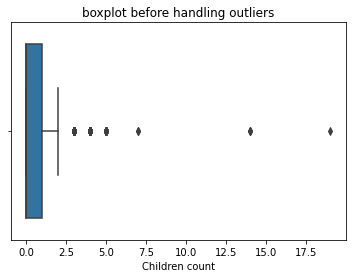

In [71]:
plt.title('boxplot before handling outliers')
print(sns.boxplot(df['Children count']))

for val in df['Children count']:
    if val in outliers:
        df['Children count']= df['Children count'].replace(val,df['Children count'].mode()[0])

Text(0.5, 1.0, 'boxplot after handling outliers')
AxesSubplot(0.125,0.125;0.775x0.755)


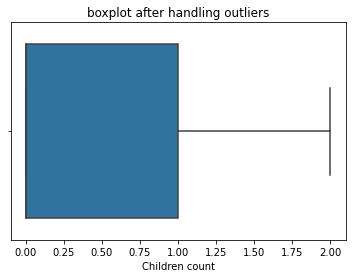

In [72]:
print(plt.title('boxplot after handling outliers'))
print(sns.boxplot(df['Children count']))

### 2. Income

AxesSubplot(0.125,0.125;0.775x0.755)


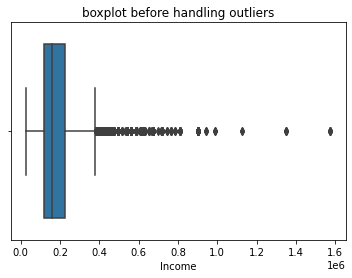

In [73]:
plt.title('boxplot before handling outliers')
print(sns.boxplot(df['Income']))

In [74]:
# iqr method 
q1,q3 = np.percentile(df['Income'],(25,75))
iqr = q3 - q1 

print('25 percentile :-', q1)
print('75 percentile :-', q3)
print('iqr is :- ', iqr)

lower_tail = q1 - 1.5*(iqr)
upper_tail = q3 + 1.5*(iqr)
print('lower tail :-',lower_tail)
print('upper tail :-',upper_tail)

outliers = []
for i in df['Income']:
    if (i<lower_tail) or (i>upper_tail):
        outliers.append(i)
print('Detected outliers are :-', list(outliers))

25 percentile :- 121500.0
75 percentile :- 225000.0
iqr is :-  103500.0
lower tail :- -33750.0
upper tail :- 380250.0
Detected outliers are :- [391500.0, 405000.0, 540000.0, 450000.0, 450000.0, 405000.0, 450000.0, 450000.0, 391500.0, 634500.0, 391500.0, 391500.0, 1350000.0, 720000.0, 391500.0, 450000.0, 427500.0, 382500.0, 382500.0, 900000.0, 405000.0, 450000.0, 405000.0, 450000.0, 560250.0, 495000.0, 540000.0, 765000.0, 405000.0, 495000.0, 540000.0, 405000.0, 450000.0, 450000.0, 450000.0, 382500.0, 450000.0, 405000.0, 450000.0, 382500.0, 540000.0, 450000.0, 405000.0, 585000.0, 405000.0, 675000.0, 450000.0, 450000.0, 387000.0, 387000.0, 540000.0, 445500.0, 675000.0, 540000.0, 810000.0, 661500.0, 427500.0, 450000.0, 900000.0, 391500.0, 382500.0, 405000.0, 405000.0, 900000.0, 405000.0, 405000.0, 405000.0, 427500.0, 540000.0, 450000.0, 630000.0, 450000.0, 405000.0, 405000.0, 1575000.0, 540000.0, 450000.0, 427500.0, 382500.0, 450000.0, 495000.0, 405000.0, 450000.0, 675000.0, 540000.0, 4050

In [75]:
max(outliers)

1575000.0

In [76]:
min(outliers)

382500.0

In [77]:
# We are replacing these outliers with median.
df.loc[df['Income']> 382500.0, 'Income'] = df.loc[df['Income']< 382500.0, 'Income'].median()

AxesSubplot(0.125,0.125;0.775x0.755)


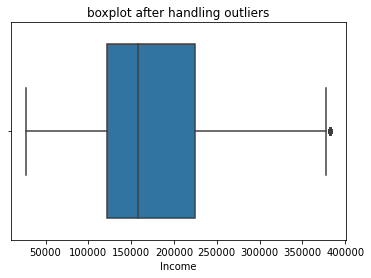

In [78]:
plt.title('boxplot after handling outliers')
print(sns.boxplot(df['Income']))

In [79]:
#observation :-
# Outlier for 'Income' attribute are removed.
# But still outliers are present.

### 3. Age

<AxesSubplot:xlabel='Age'>

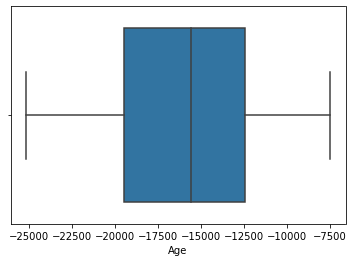

In [80]:
# boxplot before handling outliers
sns.boxplot(df['Age'])

In [81]:
# Observations:-
# Attribute 'Age' not posses any outlier.

### 4. Employment length

<AxesSubplot:title={'center':'boxplot before handling outliers'}, xlabel='Employment length'>

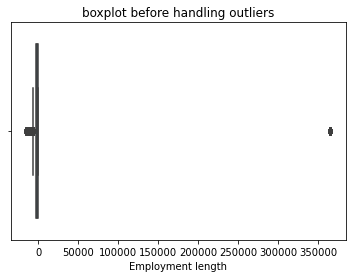

In [82]:
plt.title('boxplot before handling outliers')
sns.boxplot(df['Employment length'])

In [83]:
# IQR method
q1,q3 = np.percentile(df['Employment length'],(25,75))
iqr = q3 - q1 

print('25 percentile :-', q1)
print('75 percentile :-', q3)
print('iqr is :- ', iqr)

lower_tail = q1 - 1.5*(iqr)
upper_tail = q3 + 1.5*(iqr)
print('lower tail :-',lower_tail)
print('upper tail :-',upper_tail)

outliers = []
for i in df['Employment length']:
    if (i<lower_tail) or (i>upper_tail):
        outliers.append(i)
print('Detected outliers are :-', list(outliers))

25 percentile :- -3153.0
75 percentile :- -408.0
iqr is :-  2745.0
lower tail :- -7270.5
upper tail :- 3709.5
Detected outliers are :- [365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, -12870, 365243, 365243, 365243, -8072, 365243, 365243, -12332, 365243, 365243, 365243, -8410, 365243, 365243, 365243, -7824, 365243, -11884, 365243, 365243, 365243, -8995, 365243, 365243, 365243, 365243, -8479, 365243, 365243, 365243, 365243, -7369, 365243, 365243, 365243, -7824, -8497, 365243, 365243, -10110, 365243, 365243, 365243, 365243, 365243, -7778, 365243, 365243, 365243, 365243, 365243, 365243, -9794, 365243, 365243, -9896, -12455, 365243, 365243, -8405, 365243, -7738, 365243, 365243, 365243, -9076, 365243, 365243, 365243, 365243, -7369, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, -8803, 365243, 365243, 365243, 365243, 365243, 365243, 365243, 365243, -10821, 365243, 365243, 

In [84]:
len(outliers)

7905

In [85]:
#df.loc[df['Employment length']<lower_tail,'Employment length']
#df.loc[df['Employment length']>upper_tail,'Employment length']

In [86]:
df.loc[df['Employment length']>upper_tail,'Employment length'] = np.nan

In [87]:
df.loc[df['Employment length']<lower_tail,'Employment length'] = np.nan

In [88]:
df['Employment length'].isna().sum()

7905

In [89]:
df['Employment length'] = df['Employment length'].fillna(df['Employment length'].median())

<AxesSubplot:title={'center':'boxplot after handling outliers'}, xlabel='Employment length'>

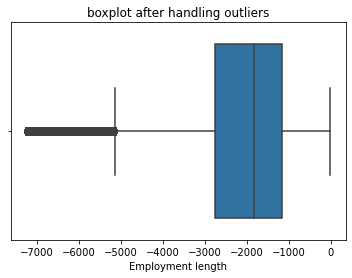

In [90]:
plt.title('boxplot after handling outliers')
sns.boxplot(df['Employment length'])

In [91]:
df['Employment length'].isna().sum()

0

In [92]:
# Observation :-
# We removed some of the outliers.
# But some outliers are still present in 'Employment length' attribute.

### 5. Family member count

In [93]:
df['Family member count'].unique()

# Though it looks like a numerical variable.
# But it is a categorical variable.
# So we can replace outliers from this attribute with mode.

array([ 2.,  4.,  1.,  3.,  5.,  6.,  7.,  9., 15., 20.])

In [94]:
df['Family member count'].nunique()

10

<AxesSubplot:title={'center':'boxplot before handling outliers'}, xlabel='Family member count'>

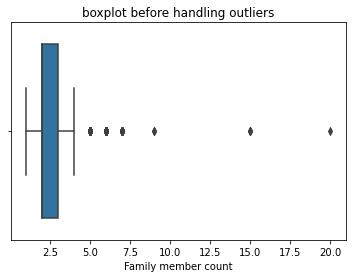

In [95]:
plt.title('boxplot before handling outliers')
sns.boxplot(df['Family member count'])

In [96]:
# IQR method
q1,q3 = np.percentile(df['Family member count'],(25,75))
iqr = q3 - q1 

print('25 percentile :-', q1)
print('75 percentile :-', q3)
print('iqr is :- ', iqr)

lower_tail = q1 - 1.5*(iqr)
upper_tail = q3 + 1.5*(iqr)
print('lower tail :-',lower_tail)
print('upper tail :-',upper_tail)

outliers = []
for i in df['Family member count']:
    if (i<lower_tail) or (i>upper_tail):
        outliers.append(i)
print('Detected outliers are :-', list(outliers),len(outliers))

25 percentile :- 2.0
75 percentile :- 3.0
iqr is :-  1.0
lower tail :- 0.5
upper tail :- 4.5
Detected outliers are :- [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 7.0, 9.0, 5.0, 5.0, 15.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 7.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 

In [97]:
min(outliers),max(outliers)

(5.0, 20.0)

In [98]:
df.loc[df['Family member count']>upper_tail, 'Family member count'] = np.nan

In [99]:
df.loc[df['Family member count']>upper_tail, 'Family member count']

Series([], Name: Family member count, dtype: float64)

In [100]:
df['Family member count'].isna().sum()

480

In [101]:
from scipy.stats import mode

In [102]:
mode(num['Family member count'])[0]

array([2.])

In [103]:
df['Family member count'].mode()[0]

2.0

In [104]:
num['Family member count'].unique()

array([ 2.,  4.,  1.,  3.,  5.,  6.,  7.,  9., 15., 20.])

In [105]:
df['Family member count'] = df['Family member count'].fillna(df['Family member count'].mode()[0])

In [106]:
df['Family member count'].isna().sum()

0

<AxesSubplot:title={'center':'boxplot after handling outliers'}, xlabel='Family member count'>

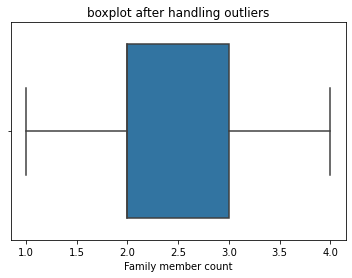

In [107]:
plt.title('boxplot after handling outliers')
sns.boxplot(df['Family member count'])

In [108]:
# Observations :-
# Outliers are completely removed

### 6. Account age

<AxesSubplot:title={'center':'boxplot before handling outliers'}, xlabel='Account age'>

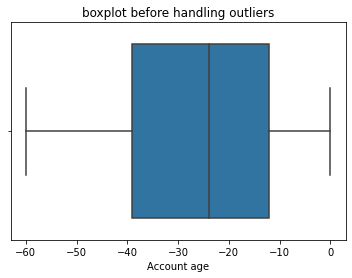

In [109]:
plt.title('boxplot before handling outliers')
sns.boxplot(df['Account age'])

In [110]:
# Observation :-
# We dont have any outliers in 'Account age' attribute.

#  

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 7291
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               36457 non-null  int64  
 1   Has a car            36457 non-null  int64  
 2   Has a property       36457 non-null  int64  
 3   Children count       36457 non-null  int64  
 4   Income               36457 non-null  float64
 5   Employment status    36457 non-null  int64  
 6   Education level      36457 non-null  int32  
 7   Marital status       36457 non-null  int32  
 8   Dwelling             36457 non-null  int32  
 9   Age                  36457 non-null  int64  
 10  Employment length    36457 non-null  float64
 11  Has a mobile phone   36457 non-null  int64  
 12  Has a work phone     36457 non-null  int64  
 13  Has a phone          36457 non-null  int64  
 14  Has an email         36457 non-null  int64  
 15  Job title            36457 non-null  

In [112]:
df['Is high risk'].value_counts()

0    35841
1      616
Name: Is high risk, dtype: int64

In [113]:
# Observations :-
# Here we can say that our data id imbalance
# we also analyse how some of attributes are in imbalance format.
# so we neet to tackle this imbalance data.

# 

# Splitting dataset

In [114]:
x = df.drop('Is high risk',axis=1)
y = df['Is high risk']

In [115]:
x.shape

(36457, 18)

In [116]:
y.shape

(36457,)

# 

# Balancing the imbalance data

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
x_osampling,y_osampling = SMOTE().fit_resample(x,y.values.ravel())

In [119]:
print(x_osampling.shape)
print(y_osampling.shape)

(71682, 18)
(71682,)


# train test split

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x_osampling,y_osampling,test_size=0.33,random_state=1,stratify=y_osampling)

In [154]:
x_train.shape

(48026, 18)

In [155]:
y_train.shape

(48026,)

In [156]:
x_test.shape

(23656, 18)

In [157]:
y_test.shape

(23656,)

# 

# Decision tree 

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree

In [159]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [160]:
y_pred_test = tree_model.predict(x_test)

In [161]:
# testing accuracies
accuracy = accuracy_score(y_test,y_pred_test)
print('accuracy for testing data is :- ', accuracy)
print()
confu_mat = confusion_matrix(y_test,y_pred_test)
print('confussion matrix for testing data is :- \n', confu_mat)
print()
class_report = classification_report(y_test,y_pred_test)
print('classification report for testing data is :- \n', class_report)

accuracy for testing data is :-  0.9708741968211024

confussion matrix for testing data is :- 
 [[11435   393]
 [  296 11532]]

classification report for testing data is :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     11828
           1       0.97      0.97      0.97     11828

    accuracy                           0.97     23656
   macro avg       0.97      0.97      0.97     23656
weighted avg       0.97      0.97      0.97     23656



In [162]:
# accuracy of training data
tree_model.score(x_train,y_train)

0.99941698246783

In [163]:
y_pred_prob_test = tree_model.predict_proba(x_test)
print(y_pred_prob_test[:,1])

[0. 1. 1. ... 0. 1. 1.]


In [164]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob_test[:,1])

Text(0, 0.5, 'tpr')

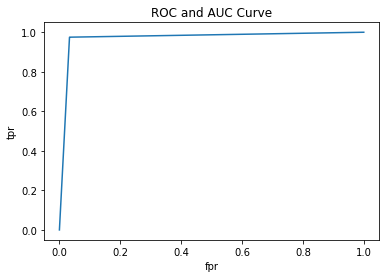

In [165]:
plt.title('ROC and AUC Curve')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [166]:
roc_auc_score(y_test,y_pred_prob_test[:,1])

0.9709553145588402

In [167]:
# Observation :-
# There is low bais and low variance in the data.
# seems that training accuracy if too high.
# so need hypertuning

### Hyper-parameter tunung

In [168]:
# using rscv search cv
model = DecisionTreeClassifier()
hype = {'criterion' : ['gini','entropy'],
        'max_depth' : np.arange(2,10),
        'min_samples_split' : np.arange(2,10),
        'min_samples_leaf' : np.arange(1,10)}
rscv_model = RandomizedSearchCV(model,hype,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [169]:
rscv_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': 9,
 'criterion': 'gini'}

In [170]:
new_tree = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=3,min_samples_split=2)
new_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3)

In [171]:
# testing accuracy after hyper-parameter tuning

y_pred_test = new_tree.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_test)
print('accuracy for testing data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_test,y_pred_test)
print('confussion matrix for testing data is :- \n', confu_mat)
print()

class_report = classification_report(y_test,y_pred_test)
print('classification report for testing data is :- \n', class_report)

accuracy for testing data is :-  0.8539059857964153

confussion matrix for testing data is :- 
 [[10157  1671]
 [ 1785 10043]]

classification report for testing data is :- 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     11828
           1       0.86      0.85      0.85     11828

    accuracy                           0.85     23656
   macro avg       0.85      0.85      0.85     23656
weighted avg       0.85      0.85      0.85     23656



In [172]:
# training accuracy after hyper-parameter tuning

y_pred_train = new_tree.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy for training data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_train,y_pred_train)
print('confussion matrix for training data is :- \n', confu_mat)
print()

class_report = classification_report(y_train,y_pred_train)
print('classification report for training data is :- \n', class_report)

accuracy for training data is :-  0.8657602132178404

confussion matrix for training data is :- 
 [[20816  3197]
 [ 3250 20763]]

classification report for training data is :- 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     24013
           1       0.87      0.86      0.87     24013

    accuracy                           0.87     48026
   macro avg       0.87      0.87      0.87     48026
weighted avg       0.87      0.87      0.87     48026



In [173]:
# observation :-
#our model accuracy is quite good.
# We need to focus on 'Falsely positive'.

# 

# Random forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
# testing accuracy in Random Forest

y_pred_test = rf_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_test)
print('accuracy for testing data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_test,y_pred_test)
print('confussion matrix for testing data is :- \n', confu_mat)
print()

class_report = classification_report(y_test,y_pred_test)
print('classification report for testing data is :- \n', class_report)

accuracy for testing data is :-  0.9877409536692594

confussion matrix for testing data is :- 
 [[11700   128]
 [  162 11666]]

classification report for testing data is :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11828
           1       0.99      0.99      0.99     11828

    accuracy                           0.99     23656
   macro avg       0.99      0.99      0.99     23656
weighted avg       0.99      0.99      0.99     23656



In [178]:
# training accuracy Random forest

y_pred_train = rf_model.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy for training data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_train,y_pred_train)
print('confussion matrix for training data is :- \n', confu_mat)
print()

class_report = classification_report(y_train,y_pred_train)
print('classification report for training data is :- \n', class_report)

accuracy for training data is :-  0.99941698246783

confussion matrix for training data is :- 
 [[24002    11]
 [   17 23996]]

classification report for training data is :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24013
           1       1.00      1.00      1.00     24013

    accuracy                           1.00     48026
   macro avg       1.00      1.00      1.00     48026
weighted avg       1.00      1.00      1.00     48026



### hyper-parameter in random forest

In [179]:
# using Rscv model
model = RandomForestClassifier()
hype = {'n_estimators' : np.arange(10,100),
        'criterion' : ['gini','entropy'],
        'max_depth' : np.arange(2,10),
        'min_samples_split' : np.arange(2,10),
        'min_samples_leaf' : np.arange(1,10)}

rscv_model = RandomizedSearchCV(model,hype,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [182]:
rscv_model.best_params_

{'n_estimators': 33,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 9,
 'criterion': 'entropy'}

In [183]:
new_rf = RandomForestClassifier(n_estimators=33,min_samples_split=4,min_samples_leaf=3,max_depth=9,criterion='entropy')
new_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=33)

In [184]:
# testing accuracy after hyper-parameter tuning

y_pred_test = new_rf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_test)
print('accuracy for testing data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_test,y_pred_test)
print('confussion matrix for testing data is :- \n', confu_mat)
print()

class_report = classification_report(y_test,y_pred_test)
print('classification report for testing data is :- \n', class_report)

accuracy for testing data is :-  0.8892458572877917

confussion matrix for testing data is :- 
 [[10146  1682]
 [  938 10890]]

classification report for testing data is :- 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     11828
           1       0.87      0.92      0.89     11828

    accuracy                           0.89     23656
   macro avg       0.89      0.89      0.89     23656
weighted avg       0.89      0.89      0.89     23656



In [185]:
# training accuracy after hyper-parameter tuning

y_pred_train = new_rf.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy for training data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_train,y_pred_train)
print('confussion matrix for training data is :- \n', confu_mat)
print()

class_report = classification_report(y_train,y_pred_train)
print('classification report for training data is :- \n', class_report)

accuracy for training data is :-  0.8939949194186483

confussion matrix for training data is :- 
 [[20659  3354]
 [ 1737 22276]]

classification report for training data is :- 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     24013
           1       0.87      0.93      0.90     24013

    accuracy                           0.89     48026
   macro avg       0.90      0.89      0.89     48026
weighted avg       0.90      0.89      0.89     48026



# 

# Adaboost 

In [186]:
from sklearn.ensemble import AdaBoostClassifier

In [187]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [188]:
# testing accuracy 

y_pred_test = adaboost.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_test)
print('accuracy for testing data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_test,y_pred_test)
print('confussion matrix for testing data is :- \n', confu_mat)
print()

class_report = classification_report(y_test,y_pred_test)
print('classification report for testing data is :- \n', class_report)

accuracy for testing data is :-  0.8112106865065946

confussion matrix for testing data is :- 
 [[9619 2209]
 [2257 9571]]

classification report for testing data is :- 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     11828
           1       0.81      0.81      0.81     11828

    accuracy                           0.81     23656
   macro avg       0.81      0.81      0.81     23656
weighted avg       0.81      0.81      0.81     23656



In [189]:
# training accuracy after hyper-parameter tuning

y_pred_train = adaboost.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy for training data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_train,y_pred_train)
print('confussion matrix for training data is :- \n', confu_mat)
print()

class_report = classification_report(y_train,y_pred_train)
print('classification report for training data is :- \n', class_report)

accuracy for training data is :-  0.8130595927206097

confussion matrix for training data is :- 
 [[19598  4415]
 [ 4563 19450]]

classification report for training data is :- 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81     24013
           1       0.82      0.81      0.81     24013

    accuracy                           0.81     48026
   macro avg       0.81      0.81      0.81     48026
weighted avg       0.81      0.81      0.81     48026



### hyper-parameter tuning

In [190]:
model = AdaBoostClassifier()
hype = {'n_estimators' : np.arange(51,100),
        'learning_rate' : np.arange(2,10)}

rscv_model = RandomizedSearchCV(model,hype,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [191]:
rscv_model.best_params_

{'n_estimators': 77, 'learning_rate': 3}

In [192]:
new_adaboost = AdaBoostClassifier(n_estimators=77,learning_rate=3)
new_adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=3, n_estimators=77)

In [193]:
# testing accuracy after hyperparameter tuning 

y_pred_test = new_adaboost.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_test)
print('accuracy for testing data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_test,y_pred_test)
print('confussion matrix for testing data is :- \n', confu_mat)
print()

class_report = classification_report(y_test,y_pred_test)
print('classification report for testing data is :- \n', class_report)

accuracy for testing data is :-  0.6262681772066283

confussion matrix for testing data is :- 
 [[ 4681  7147]
 [ 1694 10134]]

classification report for testing data is :- 
               precision    recall  f1-score   support

           0       0.73      0.40      0.51     11828
           1       0.59      0.86      0.70     11828

    accuracy                           0.63     23656
   macro avg       0.66      0.63      0.61     23656
weighted avg       0.66      0.63      0.61     23656



In [194]:
# training accuracy after hyper-parameter tuning

y_pred_train = new_adaboost.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy for training data is :- ', accuracy)
print()

confu_mat = confusion_matrix(y_train,y_pred_train)
print('confussion matrix for training data is :- \n', confu_mat)
print()

class_report = classification_report(y_train,y_pred_train)
print('classification report for training data is :- \n', class_report)

accuracy for training data is :-  0.6235372506558947

confussion matrix for training data is :- 
 [[ 9392 14621]
 [ 3459 20554]]

classification report for training data is :- 
               precision    recall  f1-score   support

           0       0.73      0.39      0.51     24013
           1       0.58      0.86      0.69     24013

    accuracy                           0.62     48026
   macro avg       0.66      0.62      0.60     48026
weighted avg       0.66      0.62      0.60     48026



## So we can say that, by looking at all accuracies i.e without tuning or with tuning, without tuning gives us good result for this dataset.

## Amongs all, Random forest gives us best result for this detaset.